In [89]:
import os
import pandas as pd
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as datetime
import matplotlib.ticker as mtick
%matplotlib inline

# File path
file_to_load = "clean_df.csv"

# Read file
white_sox_df = pd.read_csv(file_to_load)

In [92]:
white_sox_df['date'] = pd.to_datetime(white_sox_df['date'])
white_sox_df['yearmonth'] = white_sox_df['date'].apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=1)) 
white_sox_df["year"] = white_sox_df["date"].dt.year
white_sox_df["month"] = white_sox_df["date"].dt.month
white_sox_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
0,0,41280,Jefferson Park,2017-12-22,W,6104,False,False,False,False,False,2017-12-01,2017,12
1,1,41000,Cermak-Chinatown,2017-12-18,W,3636,False,False,True,False,False,2017-12-01,2017,12
2,2,40280,Central-Lake,2017-12-02,A,1270,False,False,False,False,False,2017-12-01,2017,12
3,3,40140,Dempster-Skokie,2017-12-19,W,1759,False,False,False,False,False,2017-12-01,2017,12
4,4,40690,Dempster,2017-12-03,U,499,True,False,False,True,False,2017-12-01,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196677,1028035,41700,Washington/Wabash,2020-09-26,A,2094,False,False,False,False,False,2020-09-01,2020,9
196678,1028036,41700,Washington/Wabash,2020-09-27,U,1423,False,False,False,False,False,2020-09-01,2020,9
196679,1028037,41700,Washington/Wabash,2020-09-28,W,2517,False,False,False,False,False,2020-09-01,2020,9
196680,1028038,41700,Washington/Wabash,2020-09-29,W,2710,False,False,False,False,False,2020-09-01,2020,9


In [64]:
# Creating a new dataframe for the station closest to the White Sox stadium

new_white_sox_df = white_sox_df.loc[white_sox_df['station_id'] == 40190]
new_white_sox_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
57,57,40190,Sox-35th-Dan Ryan,2017-12-27,W,2141,False,False,True,False,False,2017-12-01,2017,12
124,124,40190,Sox-35th-Dan Ryan,2017-12-06,W,4324,False,False,True,False,False,2017-12-01,2017,12
155,155,40190,Sox-35th-Dan Ryan,2017-12-28,W,2382,False,False,False,False,False,2017-12-01,2017,12
565,565,40190,Sox-35th-Dan Ryan,2017-12-23,A,2148,False,False,True,False,False,2017-12-01,2017,12
746,746,40190,Sox-35th-Dan Ryan,2017-12-20,W,3791,False,False,True,False,False,2017-12-01,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192927,1024285,40190,Sox-35th-Dan Ryan,2020-09-26,A,926,False,False,False,False,False,2020-09-01,2020,9
192928,1024286,40190,Sox-35th-Dan Ryan,2020-09-27,U,678,False,False,False,False,False,2020-09-01,2020,9
192929,1024287,40190,Sox-35th-Dan Ryan,2020-09-28,W,1011,False,False,False,False,False,2020-09-01,2020,9
192930,1024288,40190,Sox-35th-Dan Ryan,2020-09-29,W,1094,False,False,False,False,False,2020-09-01,2020,9


In [65]:
# Creating a dataframe for White Sox gamedays only

game_day_df = new_white_sox_df.loc[new_white_sox_df['White Sox'] == True]
game_day_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
17623,17627,40190,Sox-35th-Dan Ryan,2018-04-07,A,4651,False,False,True,False,True,2018-04-01,2018,4
18210,18214,40190,Sox-35th-Dan Ryan,2018-06-26,W,4711,False,False,False,False,True,2018-06-01,2018,6
18372,18377,40190,Sox-35th-Dan Ryan,2018-04-20,W,5763,False,False,False,False,True,2018-04-01,2018,4
20088,20093,40190,Sox-35th-Dan Ryan,2018-06-27,W,6539,False,False,False,False,True,2018-06-01,2018,6
20104,20109,40190,Sox-35th-Dan Ryan,2018-05-24,W,6066,False,False,False,False,True,2018-05-01,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178672,924972,40190,Sox-35th-Dan Ryan,2017-05-13,A,5238,False,False,False,False,True,2017-05-01,2017,5
180974,966910,40190,Sox-35th-Dan Ryan,2017-05-09,W,5227,False,False,False,False,True,2017-05-01,2017,5
182343,992667,40190,Sox-35th-Dan Ryan,2017-08-02,W,7634,False,True,False,False,True,2017-08-01,2017,8
183422,1012655,40190,Sox-35th-Dan Ryan,2017-09-23,A,5039,False,False,False,False,True,2017-09-01,2017,9


In [8]:
# Creating variables to display the overall gameday ridership and broken down by weekday/Saturday/Sunday/Holiday

gameday_mean = round(game_day_df['rides'].mean())
weekday_gameday_mean = round(game_day_df.loc[game_day_df['daytype'] == 'W', 'rides'].mean())
saturday_gameday_mean = round(game_day_df.loc[game_day_df['daytype'] == 'A', 'rides'].mean())
sundayholiday_gameday_mean = round(game_day_df.loc[game_day_df['daytype'] == 'U', 'rides'].mean())

In [66]:
# Dropping 2020 dates from non-gameday ridership to exclude the effect that COVID-19 had on non-gameday ridership

non_game_day_df = new_white_sox_df.loc[(new_white_sox_df['White Sox'] == False) & (~new_white_sox_df['date'].astype(str).str.contains('2020', na=False))]
non_game_day_df.sort_values(by='date', ascending=False)

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
105511,105516,40190,Sox-35th-Dan Ryan,2019-12-31,W,2395,False,False,False,False,False,2019-12-01,2019,12
105510,105515,40190,Sox-35th-Dan Ryan,2019-12-30,W,2426,False,False,True,False,False,2019-12-01,2019,12
105509,105514,40190,Sox-35th-Dan Ryan,2019-12-29,U,1622,False,False,False,False,False,2019-12-01,2019,12
105508,105513,40190,Sox-35th-Dan Ryan,2019-12-28,A,1867,False,False,True,False,False,2019-12-01,2019,12
105507,105512,40190,Sox-35th-Dan Ryan,2019-12-27,W,2567,True,False,False,False,False,2019-12-01,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136524,157595,40190,Sox-35th-Dan Ryan,2017-01-05,W,3159,False,False,False,False,False,2017-01-01,2017,1
150693,415537,40190,Sox-35th-Dan Ryan,2017-01-04,W,3106,False,False,False,False,False,2017-01-01,2017,1
152904,456086,40190,Sox-35th-Dan Ryan,2017-01-03,W,3218,False,False,False,False,False,2017-01-01,2017,1
149758,398370,40190,Sox-35th-Dan Ryan,2017-01-02,U,1908,False,False,False,False,False,2017-01-01,2017,1


In [15]:
# Creating variables to display the overall non-gameday ridership and broken down by weekday/Saturday/Sunday/Holiday

non_gameday_mean = round(non_game_day_df['rides'].mean())
weekday_nongameday_mean = round(non_game_day_df.loc[non_game_day_df['daytype'] == 'W', 'rides'].mean())
saturday_nongameday_mean = round(non_game_day_df.loc[non_game_day_df['daytype'] == 'A', 'rides'].mean())
sundayholiday_nongameday_mean = round(non_game_day_df.loc[non_game_day_df['daytype'] == 'U', 'rides'].mean())

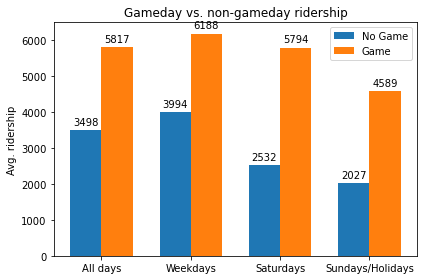

In [16]:
# Displaying the above variables in a side-by-side bar chart comparison

labels = ['All days', 'Weekdays', 'Saturdays', 'Sundays/Holidays']
nongameday_means = [non_gameday_mean, weekday_nongameday_mean, saturday_nongameday_mean, sundayholiday_nongameday_mean]
gameday_means = [gameday_mean, weekday_gameday_mean, saturday_gameday_mean, sundayholiday_gameday_mean]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nongameday_means, width, label='No Game')
rects2 = ax.bar(x + width/2, gameday_means, width, label='Game')

ax.set_ylabel('Avg. ridership')
ax.set_title('Gameday vs. non-gameday ridership')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Excluding 2020 from non-gamedays, there is still a significant increase in ridership on gamedays. On average, a gameday sees an increase of 2/3rds in riderships
* On weekdays, the ridership increases by 55%
* On Saturdays, the rirdership increases by 129%
* On Sundays/Holidays, the ridership increases by 126%

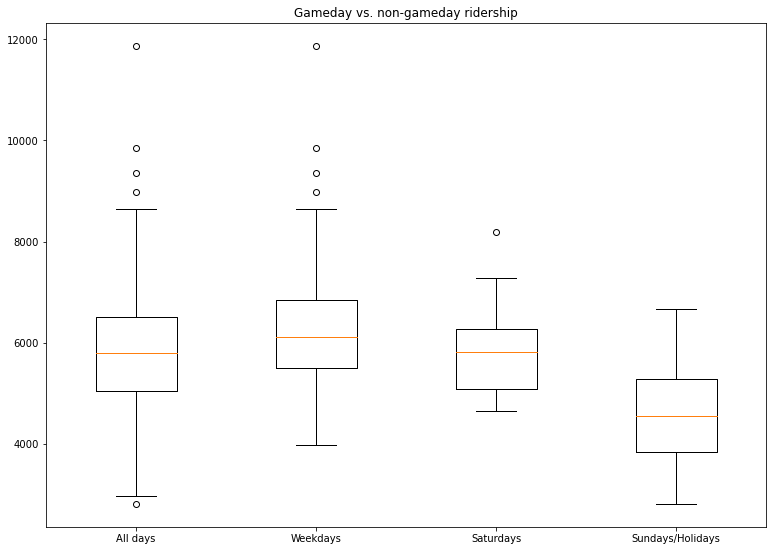

In [17]:
# Creating four variables to show the distribution of ridership on all days, weekdays, Saturdays and Sundays/Holidays

data_1 = game_day_df['rides']
data_2 = game_day_df.loc[game_day_df['daytype'] == 'W', 'rides']
data_3 = game_day_df.loc[game_day_df['daytype'] == 'A', 'rides']
data_4 = game_day_df.loc[game_day_df['daytype'] == 'U', 'rides']
data = [data_1, data_2, data_3, data_4] 
  
fig = plt.figure(figsize =(10, 7)) 
  
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_title('Gameday vs. non-gameday ridership')
  
bp = ax.boxplot(data, labels=labels) 
  
plt.show() 

## The highest gameday ridership is on weekdays with a significant dip on Sundays.
### However, the attendance on Saturdays is more predictable/even.

In [18]:
# Sorting the dataframe by ridership on gamedays

game_day_df.sort_values(by='rides', ascending=False)

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth
162887,638534,40190,Sox-35th-Dan Ryan,2017-07-27,W,11874,False,False,False,False,True,2017-07-01
40092,40097,40190,Sox-35th-Dan Ryan,2018-09-21,W,9844,False,False,False,False,True,2018-09-01
83500,83505,40190,Sox-35th-Dan Ryan,2019-07-03,W,9367,False,False,False,False,True,2019-07-01
79316,79321,40190,Sox-35th-Dan Ryan,2019-06-14,W,8989,False,False,False,False,True,2019-06-01
143983,292369,40190,Sox-35th-Dan Ryan,2017-07-26,W,8636,False,False,False,False,True,2017-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
70609,70614,40190,Sox-35th-Dan Ryan,2019-04-28,U,3307,False,False,False,False,True,2019-04-01
74876,74881,40190,Sox-35th-Dan Ryan,2019-05-19,U,3186,False,False,False,False,True,2019-05-01
70588,70593,40190,Sox-35th-Dan Ryan,2019-04-07,U,3087,False,False,False,False,True,2019-04-01
27325,27330,40190,Sox-35th-Dan Ryan,2018-05-20,U,2966,False,False,False,False,True,2018-05-01


## The White Sox game with the highest ridership was on July 27th, 2017 vs. the Cubs
### 39,422 people attended the game which means that 30% of the attendees left via CTA 'L' Train

In [31]:
# Creating a new dataframe for the station closest to the White Sox stadium

new_cubs_df = white_sox_df.loc[(white_sox_df['station_id'] == 41420) | (white_sox_df['station_id'] == 41320)]
new_cubs_df

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
9,9,41420,Addison-North Main,2017-12-19,W,6034,False,False,False,False,False,2017-12-01,2017,12
67,67,41320,Belmont-North Main,2017-12-28,W,6981,False,False,False,False,False,2017-12-01,2017,12
141,141,41320,Belmont-North Main,2017-12-12,W,11192,True,False,False,False,False,2017-12-01,2017,12
293,293,41420,Addison-North Main,2017-12-06,W,6136,False,False,True,False,False,2017-12-01,2017,12
430,430,41420,Addison-North Main,2017-12-22,W,4848,False,False,False,False,False,2017-12-01,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196287,1027645,41420,Addison-North Main,2020-09-26,A,1364,False,False,False,False,False,2020-09-01,2020,9
196288,1027646,41420,Addison-North Main,2020-09-27,U,1044,False,False,False,False,False,2020-09-01,2020,9
196289,1027647,41420,Addison-North Main,2020-09-28,W,1128,False,False,False,False,False,2020-09-01,2020,9
196290,1027648,41420,Addison-North Main,2020-09-29,W,1198,False,False,False,False,False,2020-09-01,2020,9


In [51]:
cubs_game_day_df = new_cubs_df.loc[new_cubs_df['Cubs'] == True]
cubs_game_day_df
cubs_game_day_df.sort_values(by='rides', ascending=False)

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
147536,356457,41420,Addison-North Main,2017-07-24,W,27679,False,True,False,False,False,2017-07-01,2017,7
170035,767751,41420,Addison-North Main,2017-07-25,W,21427,False,True,False,False,False,2017-07-01,2017,7
34674,34679,41420,Addison-North Main,2018-07-21,A,21289,False,True,False,False,False,2018-07-01,2018,7
82684,82689,41420,Addison-North Main,2019-06-22,A,19828,False,True,False,False,False,2019-06-01,2019,6
163087,642088,41420,Addison-North Main,2017-06-09,W,18363,False,True,False,False,False,2017-06-01,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196268,1027626,41420,Addison-North Main,2020-09-07,U,871,False,True,False,False,False,2020-09-01,2020,9
187550,1018908,41420,Addison-North Main,2020-07-26,U,814,False,True,False,False,False,2020-07-01,2020,7
191959,1023317,41420,Addison-North Main,2020-08-02,U,802,False,True,False,False,False,2020-08-01,2020,8
191973,1023331,41420,Addison-North Main,2020-08-16,U,762,False,True,False,False,False,2020-08-01,2020,8


In [33]:
cubs_gameday_mean = round(cubs_game_day_df['rides'].mean())
cubs_weekday_gameday_mean = round(cubs_game_day_df.loc[cubs_game_day_df['daytype'] == 'W', 'rides'].mean())
cubs_saturday_gameday_mean = round(cubs_game_day_df.loc[cubs_game_day_df['daytype'] == 'A', 'rides'].mean())
cubs_sundayholiday_gameday_mean = round(cubs_game_day_df.loc[cubs_game_day_df['daytype'] == 'U', 'rides'].mean())

In [34]:
cubs_non_game_day_df = new_cubs_df.loc[(new_cubs_df['White Sox'] == False) & (~new_cubs_df['date'].astype(str).str.contains('2020', na=False))]
cubs_non_game_day_df.sort_values(by='date', ascending=False)

,Unnamed: 0,station_id,stationname,date,daytype,rides,Blackhawks,Cubs,Bulls,Bears,White Sox,yearmonth,year,month
108983,108988,41420,Addison-North Main,2019-12-31,W,4217,False,False,False,False,False,2019-12-01,2019,12
108735,108740,41320,Belmont-North Main,2019-12-31,W,7491,False,False,False,False,False,2019-12-01,2019,12
108734,108739,41320,Belmont-North Main,2019-12-30,W,7684,False,False,True,False,False,2019-12-01,2019,12
108982,108987,41420,Addison-North Main,2019-12-30,W,4182,False,False,True,False,False,2019-12-01,2019,12
108733,108738,41320,Belmont-North Main,2019-12-29,U,4936,False,False,False,False,False,2019-12-01,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155596,505951,41320,Belmont-North Main,2017-01-03,W,10732,False,False,False,False,False,2017-01-01,2017,1
138732,198256,41420,Addison-North Main,2017-01-02,U,3040,False,False,False,False,False,2017-01-01,2017,1
182633,998127,41320,Belmont-North Main,2017-01-02,U,6318,False,False,False,False,False,2017-01-01,2017,1
164375,665671,41420,Addison-North Main,2017-01-01,U,4741,False,False,False,False,False,2017-01-01,2017,1


In [35]:
cubs_non_gameday_mean = round(cubs_non_game_day_df['rides'].mean())
cubs_weekday_nongameday_mean = round(cubs_non_game_day_df.loc[cubs_non_game_day_df['daytype'] == 'W', 'rides'].mean())
cubs_saturday_nongameday_mean = round(cubs_non_game_day_df.loc[cubs_non_game_day_df['daytype'] == 'A', 'rides'].mean())
cubs_sundayholiday_nongameday_mean = round(cubs_non_game_day_df.loc[cubs_non_game_day_df['daytype'] == 'U', 'rides'].mean())

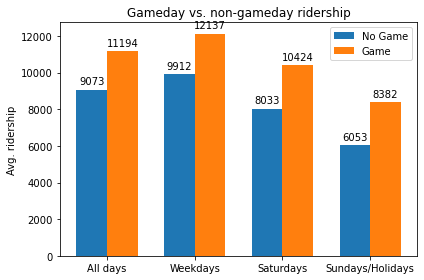

In [36]:
# Displaying the above variables in a side-by-side bar chart comparison

labels2 = ['All days', 'Weekdays', 'Saturdays', 'Sundays/Holidays']
cubs_nongameday_means = [cubs_non_gameday_mean, cubs_weekday_nongameday_mean, cubs_saturday_nongameday_mean, cubs_sundayholiday_nongameday_mean]
cubs_gameday_means = [cubs_gameday_mean, cubs_weekday_gameday_mean, cubs_saturday_gameday_mean, cubs_sundayholiday_gameday_mean]

x2 = np.arange(len(labels2))
width2 = 0.35

fig, ax = plt.subplots()
rects3 = ax.bar(x2 - width2/2, cubs_nongameday_means, width2, label='No Game')
rects4 = ax.bar(x2 + width2/2, cubs_gameday_means, width2, label='Game')

ax.set_ylabel('Avg. ridership')
ax.set_title('Gameday vs. non-gameday ridership')
ax.set_xticks(x)
ax.set_xticklabels(labels2)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

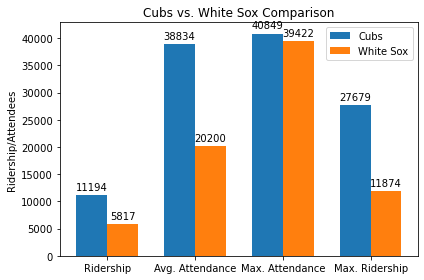

<Figure size 432x288 with 0 Axes>

In [54]:
# Doing a Cubs vs. White Sox comparison

labels3 = ['Ridership', 'Avg. Attendance', 'Max. Attendance', 'Max. Ridership']
cubs_means = [cubs_gameday_mean, 38834, 40849, 27679]
whitesox_means = [gameday_mean, 20200, 39422, 11874]

x3 = np.arange(len(labels3))
width3 = 0.35

fig, ax = plt.subplots()
rects5 = ax.bar(x3 - width3/2, cubs_means, width3, label='Cubs')
rects6 = ax.bar(x3 + width3/2, whitesox_means, width3, label='White Sox')

ax.set_ylabel('Ridership/Attendees')
ax.set_title('Cubs vs. White Sox Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels3)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.show()
plt.savefig('cubs_vs_sox.png')

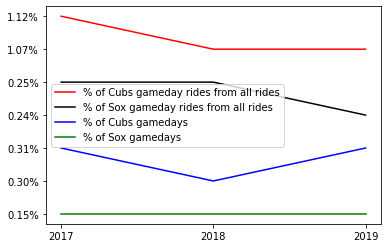

In [105]:
years2 = ["2017", "2018", "2019"]
cubs_gamedayrides_2017 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2017, 'rides'].sum())
total_rides_2017 = round(white_sox_df.loc[white_sox_df['year'] == 2017, 'rides'].sum())
cubs_percentage_of_gameday_rides_2017 = "{:.2%}".format(cubs_gamedayrides_2017/total_rides_2017)
sox_gamedayrides_2017 = round(game_day_df.loc[game_day_df['year'] == 2017, 'rides'].sum())
sox_percentage_of_gameday_rides_2017 = "{:.2%}".format(sox_gamedayrides_2017/total_rides_2017)
cubs_gamedayrides_2018 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2018, 'rides'].sum())
total_rides_2018 = round(white_sox_df.loc[white_sox_df['year'] == 2018, 'rides'].sum())
cubs_percentage_of_gameday_rides_2018 = "{:.2%}".format(cubs_gamedayrides_2018/total_rides_2018)
sox_gamedayrides_2018 = round(game_day_df.loc[game_day_df['year'] == 2018, 'rides'].sum())
sox_percentage_of_gameday_rides_2018 = "{:.2%}".format(sox_gamedayrides_2018/total_rides_2018)
cubs_gamedayrides_2019 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2019, 'rides'].sum())
total_rides_2019 = round(white_sox_df.loc[white_sox_df['year'] == 2019, 'rides'].sum())
cubs_percentage_of_gameday_rides_2019 = "{:.2%}".format(cubs_gamedayrides_2019/total_rides_2019)
sox_gamedayrides_2019 = round(game_day_df.loc[game_day_df['year'] == 2019, 'rides'].sum())
sox_percentage_of_gameday_rides_2019 = "{:.2%}".format(sox_gamedayrides_2019/total_rides_2019)
cubs_percentage_of_gameday_rides = [cubs_percentage_of_gameday_rides_2017, cubs_percentage_of_gameday_rides_2018, cubs_percentage_of_gameday_rides_2019]
sox_percentage_of_gameday_rides = [sox_percentage_of_gameday_rides_2017, sox_percentage_of_gameday_rides_2018, sox_percentage_of_gameday_rides_2019]

cubs_gamedays_2017 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2017, 'rides'].count())
total_days_2017 = round(white_sox_df.loc[white_sox_df['year'] == 2017, 'rides'].count())
cubs_percentage_of_rides_2017 = "{:.2%}".format(cubs_gamedays_2017/total_days_2017)
sox_gamedays_2017 = round(game_day_df.loc[game_day_df['year'] == 2017, 'rides'].count())
sox_percentage_of_rides_2017 = "{:.2%}".format(sox_gamedays_2017/total_days_2017)
cubs_gamedays_2018 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2018, 'rides'].count())
total_days_2018 = round(white_sox_df.loc[white_sox_df['year'] == 2018, 'rides'].count())
cubs_percentage_of_rides_2018 = "{:.2%}".format(cubs_gamedays_2018/total_days_2018)
sox_gamedays_2018 = round(game_day_df.loc[game_day_df['year'] == 2018, 'rides'].count())
sox_percentage_of_rides_2018 = "{:.2%}".format(sox_gamedays_2018/total_days_2018)
cubs_gamedays_2019 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2019, 'rides'].count())
total_days_2019 = round(white_sox_df.loc[white_sox_df['year'] == 2019, 'rides'].count())
cubs_percentage_of_rides_2019 = "{:.2%}".format(cubs_gamedays_2019/total_days_2019)
sox_gamedays_2019 = round(game_day_df.loc[game_day_df['year'] == 2019, 'rides'].count())
sox_percentage_of_rides_2019 = "{:.2%}".format(sox_gamedays_2019/total_days_2019)
cubs_percentage_of_rides = [cubs_percentage_of_rides_2017, cubs_percentage_of_rides_2018, cubs_percentage_of_rides_2019]
sox_percentage_of_rides = [sox_percentage_of_rides_2017, sox_percentage_of_rides_2018, sox_percentage_of_rides_2019]

# Plot the world average as a line chart
cubs_rides = plt.plot(years2, cubs_percentage_of_gameday_rides, color="red", label="% of Cubs gameday rides from all rides")
sox_rides = plt.plot(years2, sox_percentage_of_gameday_rides, color="black", label="% of Sox gameday rides from all rides")
cubs_rides_2 = plt.plot(years2, cubs_percentage_of_rides, color="blue", label="% of Cubs gamedays")
sox_rides_2 = plt.plot(years2, sox_percentage_of_rides, color="green", label="% of Sox gamedays")

plt.legend()
plt.gca().invert_yaxis()

# Show the chart
plt.show()

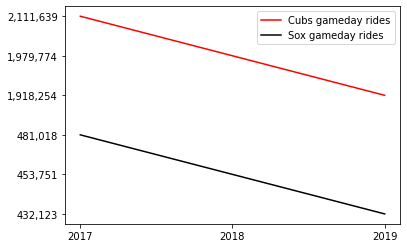

In [110]:
years2 = ["2017", "2018", "2019"]
cubs_gamedayrides_2017 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2017, 'rides'].sum())
sox_gamedayrides_2017 = round(game_day_df.loc[game_day_df['year'] == 2017, 'rides'].sum())
cubs_gamedayrides_2018 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2018, 'rides'].sum())
sox_gamedayrides_2018 = round(game_day_df.loc[game_day_df['year'] == 2018, 'rides'].sum())
cubs_gamedayrides_2019 = round(cubs_game_day_df.loc[cubs_game_day_df['year'] == 2019, 'rides'].sum())
sox_gamedayrides_2019 = round(game_day_df.loc[game_day_df['year'] == 2019, 'rides'].sum())
cubs_gamedayrides = [f'{cubs_gamedayrides_2017:,}', f'{cubs_gamedayrides_2018:,}', f'{cubs_gamedayrides_2019:,}']
sox_gamedayrides = [f'{sox_gamedayrides_2017:,}', f'{sox_gamedayrides_2018:,}', f'{sox_gamedayrides_2019:,}']

# Plot the world average as a line chart
cubs_rides_3 = plt.plot(years2, cubs_gamedayrides, color="red", label="Cubs gameday rides")
sox_rides_3 = plt.plot(years2, sox_gamedayrides, color="black", label="Sox gameday rides")

plt.legend()
plt.gca().invert_yaxis()

# Show the chart
plt.show()

In [111]:
cubs_gamedayrides_2017

2111639

In [112]:
cubs_gamedayrides_2019

1918254